## Подключение необходимых библиотек

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib as matplotlib
print(f"Matplotlib: {matplotlib.__version__}")
print(f"Seaborn: {sns.__version__}")

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

Matplotlib: 3.3.4
Seaborn: 0.11.1


In [2]:
SEED = 42
FIGSIZE = (12,5)
FONTSIZE = 14
YEARS_PREDICT = 2

## Загрузка данных

In [3]:
PATH = './data/'

try:
    X = pd.read_csv(PATH+'features.csv', index_col=0)
    y = pd.read_csv(PATH+'target.csv', index_col=0)
    print('All of the data has been loaded successfully!')
except Exception as err:
    print(repr(err))
print()

All of the data has been loaded successfully!



In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 2010 to 2020
Data columns (total 10 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Реальные располагаемые денежные доходы населения                                         5 non-null      float64
 1   Внешнеторговый оборот                                                                    11 non-null     float64
 2   Численность постоянного населения                                                        11 non-null     float64
 3   Инвестиции в основной капитал                                                            11 non-null     int64  
 4   Ввод в эксплуатацию жилых домов                                                          11 non-null     float64
 5   Оборот розничной торговли                                    

In [5]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 2010 to 2020
Data columns (total 2 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Налог на доходы физических лиц  11 non-null     float64
 1   Налог на прибыль организаций    11 non-null     float64
dtypes: float64(2)
memory usage: 264.0 bytes


In [6]:
X

,Реальные располагаемые денежные доходы населения,Внешнеторговый оборот,Численность постоянного населения,Инвестиции в основной капитал,Ввод в эксплуатацию жилых домов,Оборот розничной торговли,Объем платных услуг населению,Фонд заработной платы,"Численность безработных, зарегистрированных в службах занятости",Уровень зарегистрированной безработицы (к численности экономически активного населения)
Год,,,,,,,,,,
2010,100.00,1305.00,679.80,19600,150.00,73500,24500,68900,12.60,3.30
2011,101.00,1527.00,677.70,27450,145.00,71400,21800,66200,12.70,3.39
2012,102.00,1995.00,633.50,38610,240.00,89600,24500,72760,9.90,2.66
2013,103.00,2070.00,633.10,44420,299.10,100000,31700,85400,8.20,2.30
2014,102.00,1440.00,631.40,47400,225.00,111000,32600,96500,7.50,2.27
2015,NaN,1513.00,628.20,43890,238.00,116000,35400,90100,6.90,2.21
2016,NaN,1079.80,623.90,43750,252.00,112000,39700,91300,7.50,2.33
2017,NaN,865.00,622.30,44560,260.00,127200,37600,90600,7.80,2.41
2018,NaN,1067.70,619.00,47300,280.00,124800,36600,89700,6.88,2.13


In [7]:
y

,Налог на доходы физических лиц,Налог на прибыль организаций
Год,,
2010,8415764100.00,971518000.00
2011,8033981768.00,3350000000.00
2012,9351989850.00,5619500000.00
2013,10207986563.00,6088000000.00
2014,11252026928.00,3563000000.00
2015,11452230385.89,2950636000.00
2016,7865385000.00,4483000000.00
2017,11304320582.21,5204100000.00
2018,11865117341.00,4634560000.00


Объединим признаки и целевой признак

In [8]:
df = pd.concat([X, y], axis=1)
df

,Реальные располагаемые денежные доходы населения,Внешнеторговый оборот,Численность постоянного населения,Инвестиции в основной капитал,Ввод в эксплуатацию жилых домов,Оборот розничной торговли,Объем платных услуг населению,Фонд заработной платы,"Численность безработных, зарегистрированных в службах занятости",Уровень зарегистрированной безработицы (к численности экономически активного населения),Налог на доходы физических лиц,Налог на прибыль организаций
Год,,,,,,,,,,,,
2010,100.00,1305.00,679.80,19600,150.00,73500,24500,68900,12.60,3.30,8415764100.00,971518000.00
2011,101.00,1527.00,677.70,27450,145.00,71400,21800,66200,12.70,3.39,8033981768.00,3350000000.00
2012,102.00,1995.00,633.50,38610,240.00,89600,24500,72760,9.90,2.66,9351989850.00,5619500000.00
2013,103.00,2070.00,633.10,44420,299.10,100000,31700,85400,8.20,2.30,10207986563.00,6088000000.00
2014,102.00,1440.00,631.40,47400,225.00,111000,32600,96500,7.50,2.27,11252026928.00,3563000000.00
2015,NaN,1513.00,628.20,43890,238.00,116000,35400,90100,6.90,2.21,11452230385.89,2950636000.00
2016,NaN,1079.80,623.90,43750,252.00,112000,39700,91300,7.50,2.33,7865385000.00,4483000000.00
2017,NaN,865.00,622.30,44560,260.00,127200,37600,90600,7.80,2.41,11304320582.21,5204100000.00
2018,NaN,1067.70,619.00,47300,280.00,124800,36600,89700,6.88,2.13,11865117341.00,4634560000.00


In [9]:
df.iloc[:,:5]

,Реальные располагаемые денежные доходы населения,Внешнеторговый оборот,Численность постоянного населения,Инвестиции в основной капитал,Ввод в эксплуатацию жилых домов
Год,,,,,
2010,100.00,1305.00,679.80,19600,150.00
2011,101.00,1527.00,677.70,27450,145.00
2012,102.00,1995.00,633.50,38610,240.00
2013,103.00,2070.00,633.10,44420,299.10
2014,102.00,1440.00,631.40,47400,225.00
2015,NaN,1513.00,628.20,43890,238.00
2016,NaN,1079.80,623.90,43750,252.00
2017,NaN,865.00,622.30,44560,260.00
2018,NaN,1067.70,619.00,47300,280.00


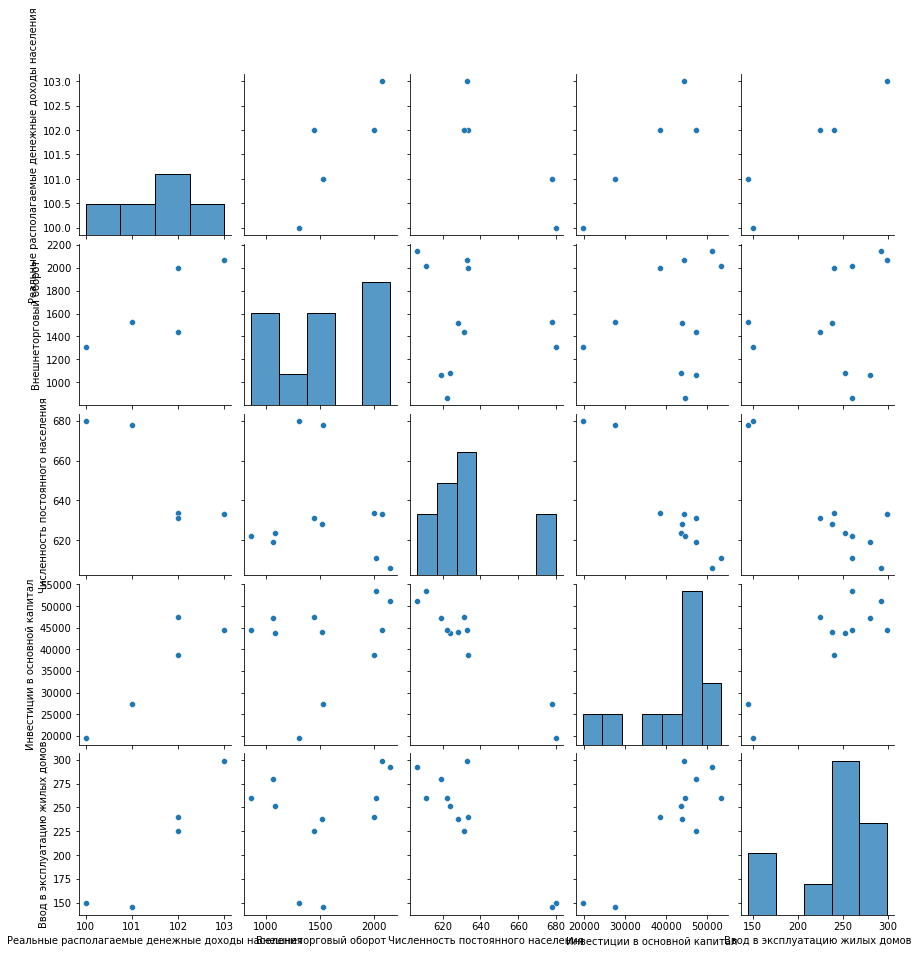

In [10]:
sns.pairplot(df.iloc[:,:5])

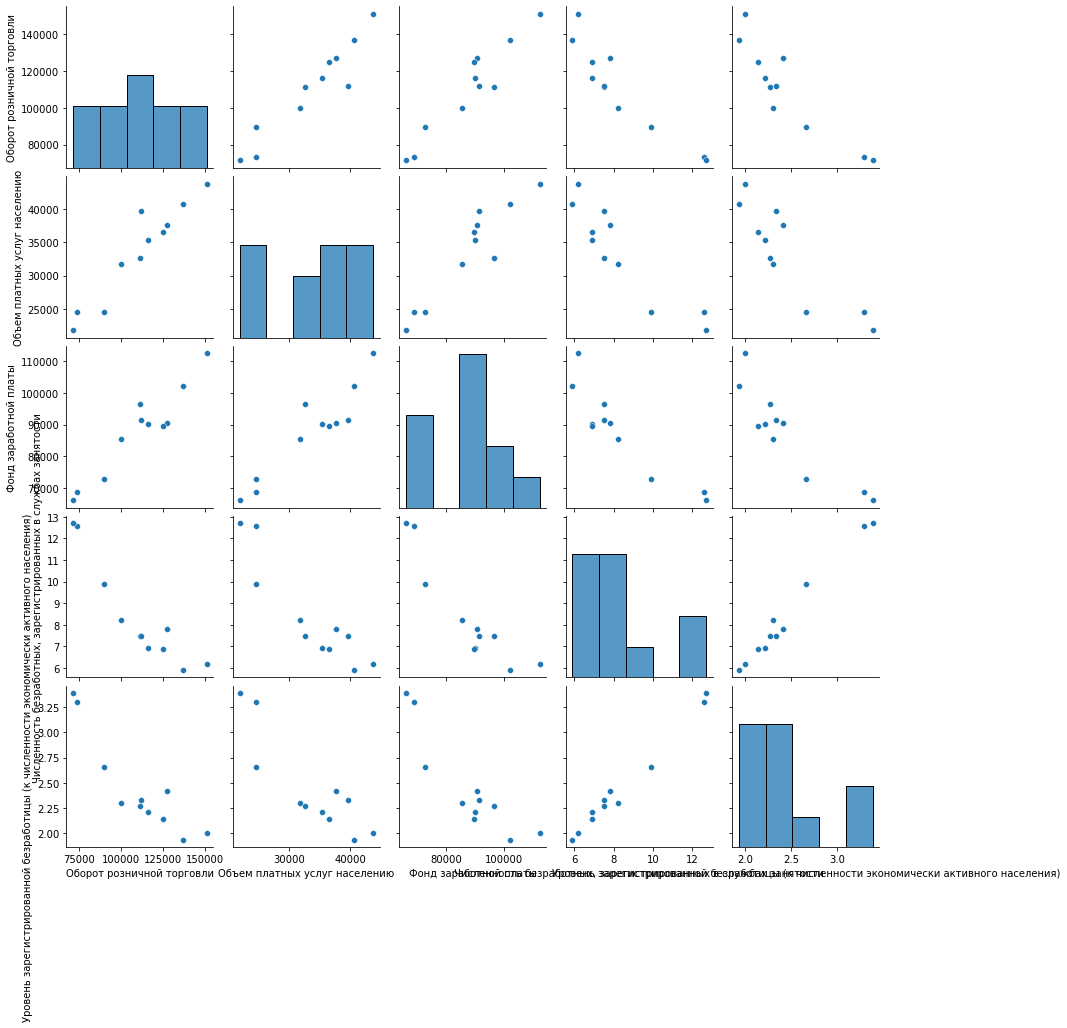

In [11]:
sns.pairplot(df.iloc[:,5:10])

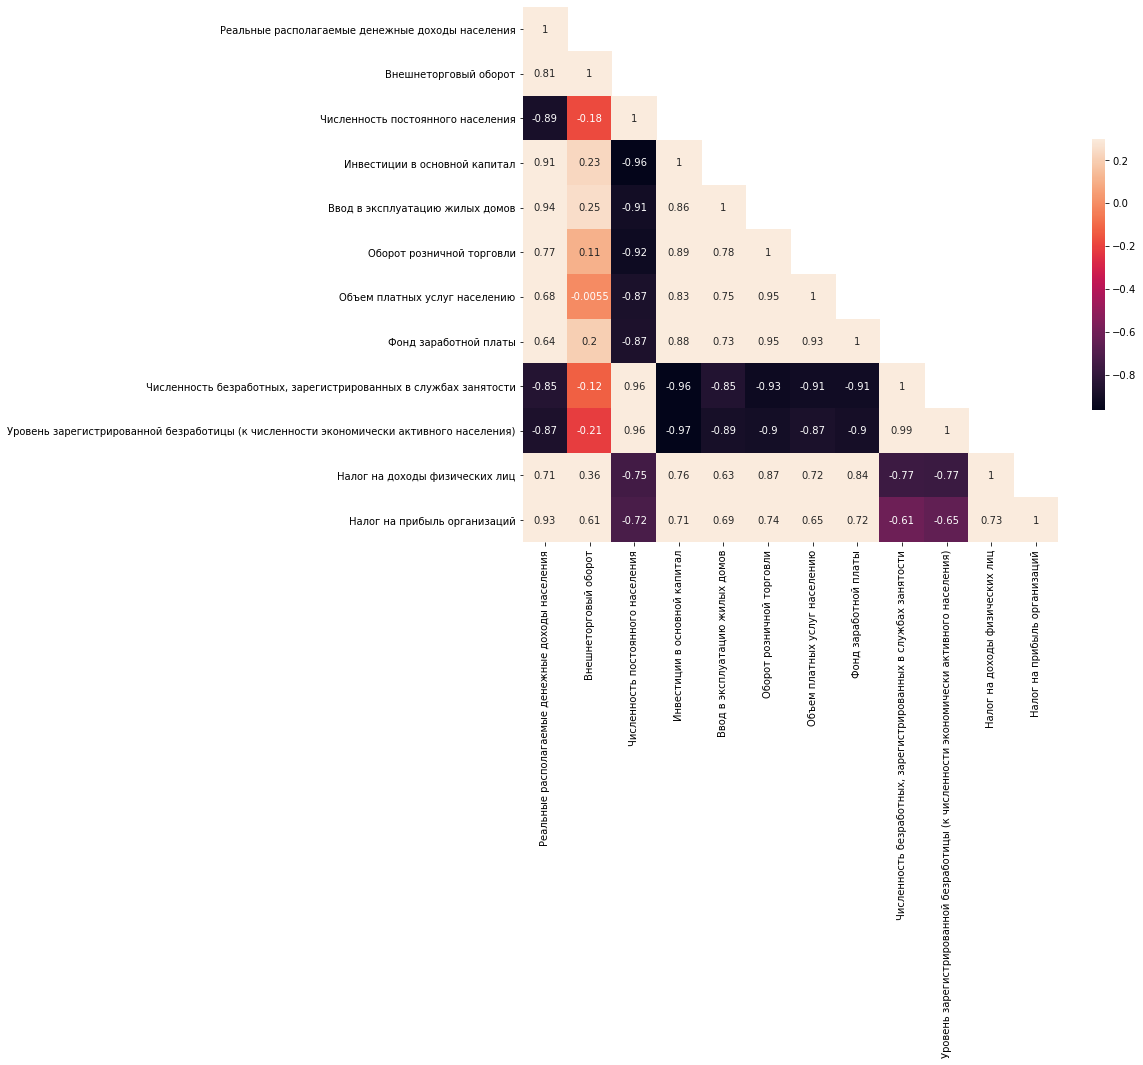

In [12]:
corrMatrix = df.corr(method='pearson', min_periods=1)
plt.figure(figsize=(12,10))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corrMatrix, dtype=bool), k=1)
ax = sns.heatmap(corrMatrix, square=True, vmax=.3, annot=True, mask=mask, cbar_kws={"shrink": .5})
plt.show()

In [13]:
TARGET = 'Налог на доходы физических лиц'

In [14]:
cor = 1.1

In [15]:
X_train, X_test = X[:-YEARS_PREDICT], X[-YEARS_PREDICT:]
y_train, y_test = y[:-YEARS_PREDICT], y[-YEARS_PREDICT:]

In [16]:
def predict(model, X_train=None, y_train=None, X_test=None):
    X_train = X_train.fillna(0)
    X_test = X_test.fillna(0)
    m = model
    m.fit(X_train, y_train)
    return m, m.predict(X_test)

In [17]:
from sklearn.linear_model import LinearRegression

model, predicted = predict(LinearRegression(), X_train, y_train[TARGET], X_test)

In [18]:
df_predict = pd.DataFrame({'model_name': [], 'model': [], 'predicted': []})
df_predict = df_predict.append({'model_name': 'Linear', 'model': model, 'predicted': predicted}, ignore_index=True)
df_predict

,model_name,model,predicted
0,Linear,LinearRegression(),"[11465568111.364746, 15562720978.735474]"


In [19]:
df_predict['predicted']

0    [11465568111.364746, 15562720978.735474]
Name: predicted, dtype: object

In [20]:
from catboost import CatBoostRegressor

catboost_params = {
    'depth': 6,
    #'l2_leaf_reg': 10,
    'iterations': 30000,
    'learning_rate': 0.1,
    'eval_metric': 'MAE',
    'early_stopping_rounds': 50,
    'verbose': 5000,
    'thread_count': 4,
    'random_seed': SEED
}

model, predicted = predict(CatBoostRegressor(**catboost_params), X_train, y_train[TARGET], X_test)

0:	learn: 1324649732.9894376	total: 151ms	remaining: 1h 15m 43s
5000:	learn: 0.0000144	total: 2.15s	remaining: 10.7s
10000:	learn: 0.0000144	total: 4.02s	remaining: 8.03s
15000:	learn: 0.0000144	total: 6.13s	remaining: 6.13s
20000:	learn: 0.0000144	total: 8.26s	remaining: 4.13s
25000:	learn: 0.0000144	total: 10.1s	remaining: 2.02s
29999:	learn: 0.0000144	total: 12s	remaining: 0us


In [21]:
df_predict = df_predict.append({'model_name': 'CatBoost', 'model': model, 'predicted': predicted*cor}, ignore_index=True)
df_predict

,model_name,model,predicted
0,Linear,LinearRegression(),"[11465568111.364746, 15562720978.735474]"
1,CatBoost,<catboost.core.CatBoostRegressor object at 0x0...,"[11717545248.242462, 11727431033.476711]"


In [22]:
from catboost import Pool
import shap as shap

feature_importance_df = pd.DataFrame(df_predict[df_predict['model_name'] == 'CatBoost']['model'].iloc[0].feature_importances_, index=X.columns)
feature_importance_df.sort_values(by=0, ascending=False)

,0
Инвестиции в основной капитал,27.38
Оборот розничной торговли,17.11
"Численность безработных, зарегистрированных в службах занятости",13.10
Уровень зарегистрированной безработицы (к численности экономически активного населения),11.82
Объем платных услуг населению,8.55
Фонд заработной платы,5.88
Реальные располагаемые денежные доходы населения,5.19
Внешнеторговый оборот,4.55
Ввод в эксплуатацию жилых домов,4.11
Численность постоянного населения,2.30


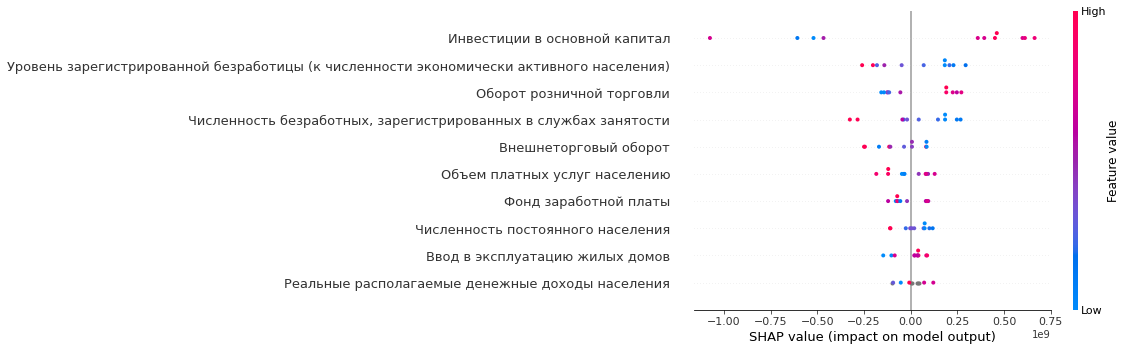

In [23]:
train_data = Pool(data=X,
                  label=y
                 )
                 
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X, feature_names=X.columns)

In [24]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(y_train[TARGET], order=(3,2,1))
arima_result = model.fit()
arima_result.summary()
#predicted = model_result.forecast()

An unsupported index was provided and will be ignored when e.g. forecasting.
An unsupported index was provided and will be ignored when e.g. forecasting.
An unsupported index was provided and will be ignored when e.g. forecasting.
Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:     Налог на доходы физических лиц   No. Observations:                    9
Model:                             ARIMA(3, 2, 1)   Log Likelihood                -161.200
Date:                            Sat, 04 Sep 2021   AIC                            332.400
Time:                                    14:08:53   BIC                            332.129
Sample:                                         0   HQIC                           329.057
                                              - 9                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6310      3.821     -0.165      0.869      -8.119       6.857
ar.L2         -0.4616      2.483     -0.186      0.853      -5.328       4.405
ar.L3         -0.1938      1.403     -0.138      0.890      -2.943       2.555
ma.L1         -0.1558      3.664     -0.043      0.966      -7.336       7.025
sigma2      7.087e+18        nan        nan        nan         nan         nan
===================================================================================
Ljung-Box (L1) (Q):                   0.98   Jarque-Bera (JB):                 0.26
Prob(Q):                              0.32   Prob(JB):                         0.88
Heteroskedasticity (H):               2.71   Skew:                             0.47
Prob(H) (two-sided):                  0.54   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.71e+54. Standard errors may be unstable.
"""

In [25]:
arima_pred = arima_result.predict(start = len(y_train), end = len(y)-1, typ="levels").rename("ARIMA Predictions")*cor
arima_pred

No supported index is available. Prediction results will be given with an integer index beginning at `start`.


9    12871394995.90
10   13158040143.77
Name: ARIMA Predictions, dtype: float64

In [26]:
df_predict = df_predict.append({'model_name': 'ARIMA', 'model': arima_result, 'predicted': arima_pred}, ignore_index=True)
df_predict

,model_name,model,predicted
0,Linear,LinearRegression(),"[11465568111.364746, 15562720978.735474]"
1,CatBoost,<catboost.core.CatBoostRegressor object at 0x0...,"[11717545248.242462, 11727431033.476711]"
2,ARIMA,<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,9 12871394995.90 10 13158040143.77 Name: ...


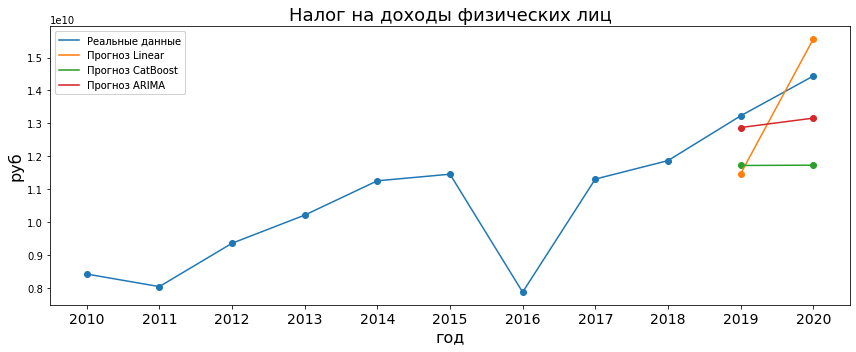

In [27]:
width = 0.4  # the width of the bars
xt = np.arange(len(X.index))

fig, ax = plt.subplots(figsize=FIGSIZE)
ax.plot(xt, y.iloc[:,0])
ax.scatter(xt, y.iloc[:,0])
for i in range(df_predict.shape[0]):
    ax.plot(xt[-YEARS_PREDICT:], df_predict.loc[i, 'predicted'])
    ax.scatter(xt[-YEARS_PREDICT:], df_predict.loc[i, 'predicted'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('руб', fontsize=FONTSIZE+2)
ax.set_xlabel('год', fontsize=FONTSIZE+2)

ax.set_title(TARGET, fontsize=FONTSIZE+4)
ax.set_xticks(xt)
ax.set_xticklabels([str(y) for y in X.index], fontsize=FONTSIZE)
l = [f'Прогноз {model}' for model in df_predict['model_name']]
legend1 = ax.legend(['Реальные данные', *l])
ax.add_artist(legend1)

fig.tight_layout()

plt.show()